In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")

df = pd.read_csv("../datasets/autos.csv")
df.head()

X = df.copy()
y = X.pop("price")

In [3]:
# Label encoding for categoricals
# Convert categorical features to numerical using factorization
# This will convert all object dtypes to category codes
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [4]:
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [5]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

curb_weight          1.501854
highway_mpg          0.950488
length               0.604629
bore                 0.489400
stroke               0.393060
num_of_cylinders     0.332501
compression_ratio    0.133928
fuel_type            0.048139
Name: MI Scores, dtype: float64

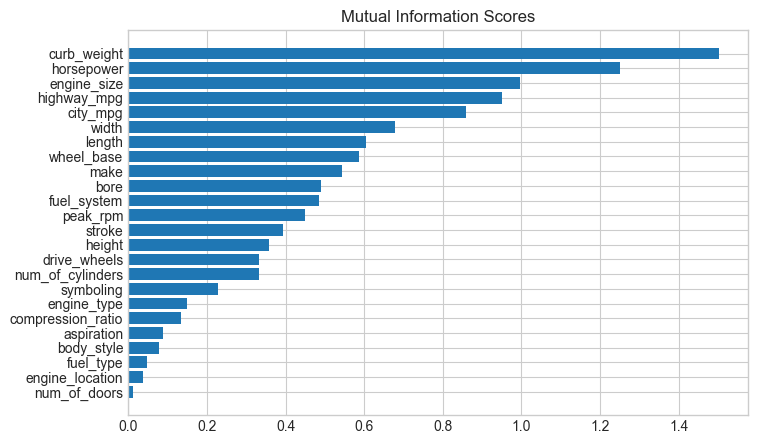

In [6]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

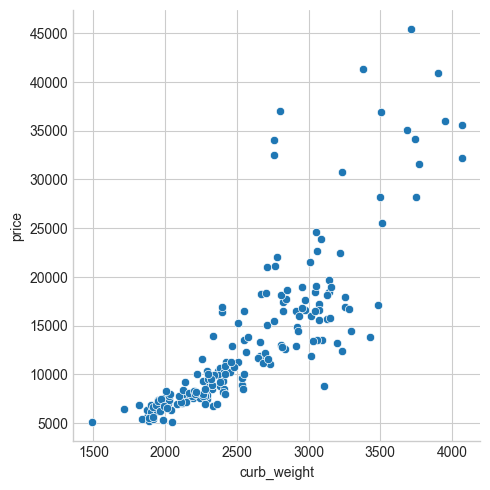

In [7]:
sns.relplot(x="curb_weight", y="price", data=df)

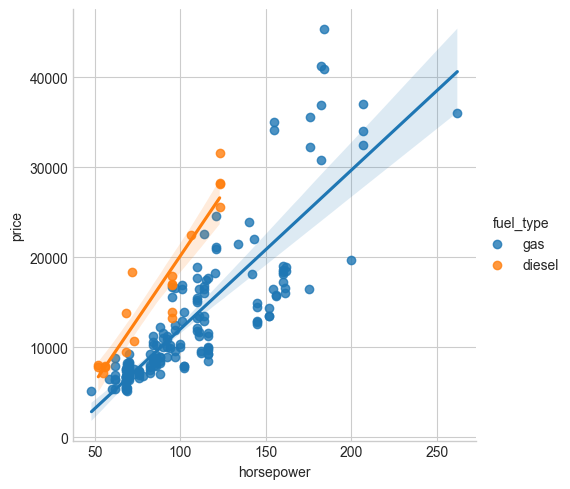

In [8]:
# creates a scatter plot with a linear regression line for each category of fuel_type using Seaborn.
sns.lmplot(x="horsepower", y="price", hue="fuel_type", data=df)

fuel_type 特徵的 MI 得分相當低，但從圖中可以看出，它清晰地區分了 horsepower 特徵中兩個趨勢不同的價格群體。
這表明 fuel_type 具有交互效應，而且可能並非不重要。在根據 MI 得分判斷某個特徵不重要之前，最好先調查任何可能的交互效應 —— 專門領域的知識可以提供很多對資料的洞察想法。